In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('Fraud.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.shape

(6362620, 11)

In [48]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [13]:
df1= df.drop(['nameOrig', 'nameDest'], axis='columns')

In [15]:
df1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [216]:
df1[['amount', 'oldbalanceOrg','newbalanceOrig']].describe()

,amount,oldbalanceOrg,newbalanceOrig
count,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05
std,6.038582e+05,2.888243e+06,2.924049e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05
max,9.244552e+07,5.958504e+07,4.958504e+07


# Detecting Outliers

<Axes: >

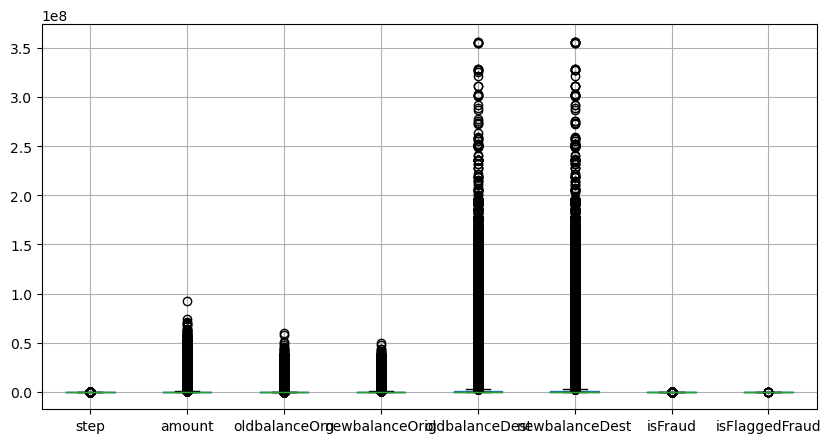

In [19]:
df1.boxplot(figsize=(10,5))

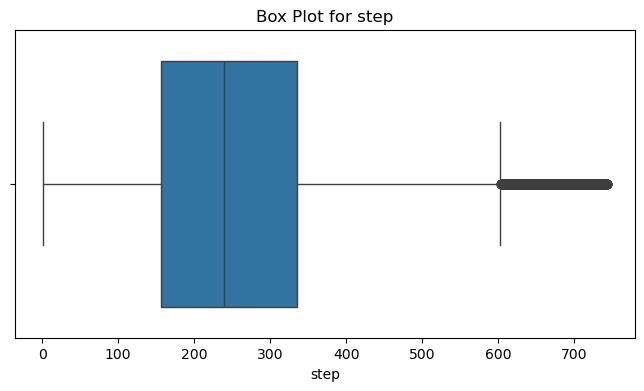

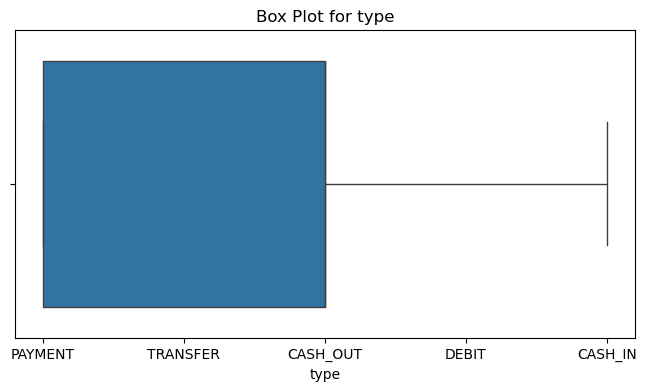

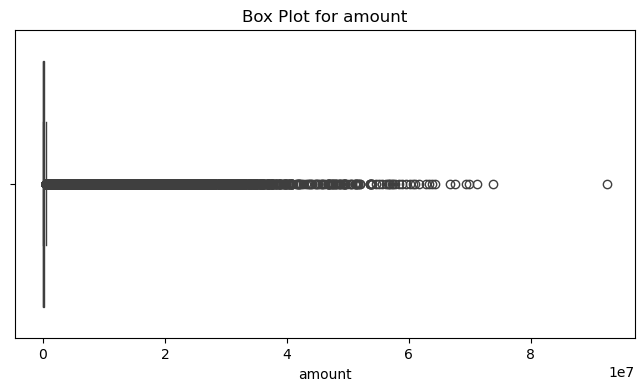

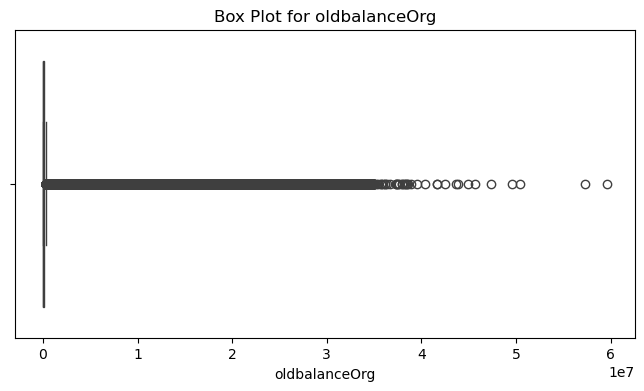

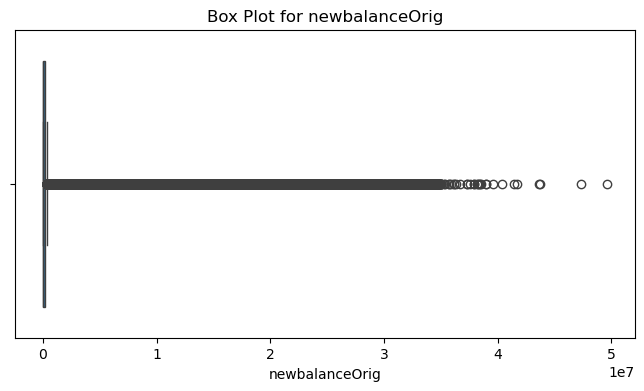

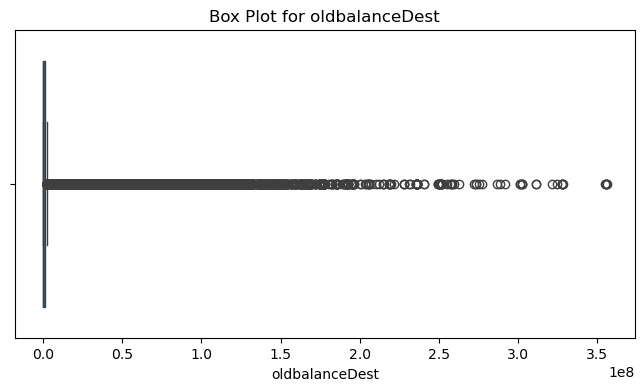

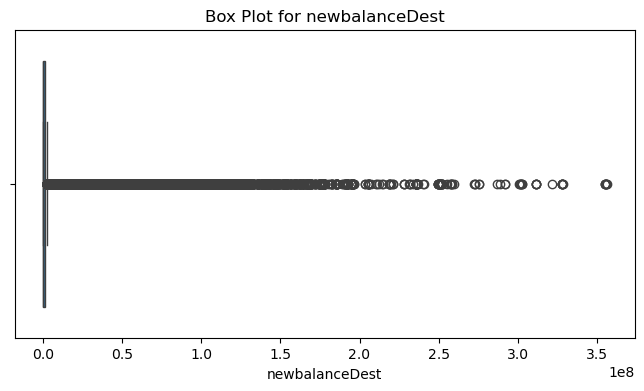

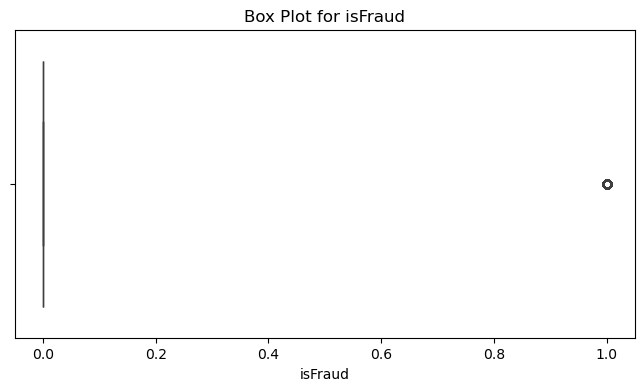

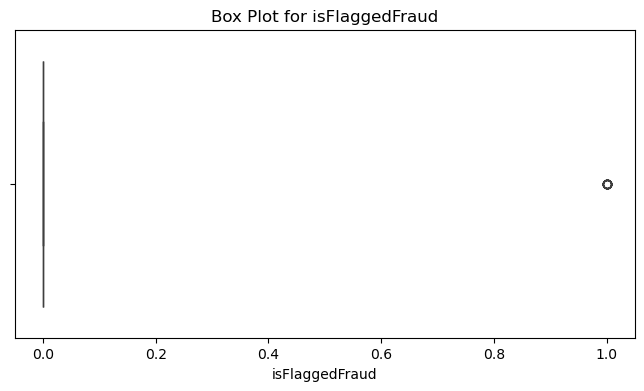

In [50]:
for column in df1.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df1[column])
    plt.title(f"Box Plot for {column}")
    plt.show()


In [26]:
def detect_outliers(df1, column):
    upper_limit = df1[column].mean() +  3*df1[column].std()
    lower_limit =df1[column].mean() - 3*df1[column].std()
   
    outliers = df1[(df1[column] <lower_limit) | (df1[column] > upper_limit)]
    return outliers

In [62]:
detect_outliers(df1, 'amount')


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
359,1,TRANSFER,2421578.09,0.00,0.00,8515645.77,19169204.93,0,0
375,1,TRANSFER,2545478.01,0.00,0.00,12394437.40,19169204.93,0,0
376,1,TRANSFER,2061082.82,0.00,0.00,14939915.42,19169204.93,0,0
1153,1,TRANSFER,3776389.09,0.00,0.00,10138670.86,16874643.09,0,0
1202,1,TRANSFER,2258388.15,0.00,0.00,2784129.27,4619798.56,0,0
...,...,...,...,...,...,...,...,...,...
6362584,741,TRANSFER,5674547.89,5674547.89,5674547.89,0.00,0.00,1,1
6362598,742,TRANSFER,4009058.39,4009058.39,0.00,0.00,0.00,1,0
6362599,742,CASH_OUT,4009058.39,4009058.39,0.00,1229761.96,5238820.34,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0


In [38]:
detect_outliers(df1,'oldbalanceOrg')

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
662,1,CASH_IN,270824.42,9716462.14,9987286.56,8515810.04,10681238.79,0,0
1329,1,CASH_IN,269736.99,9630666.58,9900403.57,473512.63,32092.07,0,0
1330,1,CASH_IN,18622.16,9900403.57,9919025.73,55379.84,36757.68,0,0
1331,1,CASH_IN,183816.31,9919025.73,10102842.03,2391652.26,1412484.09,0,0
1332,1,CASH_IN,143405.80,10102842.03,10246247.83,195636.81,9291619.62,0,0
...,...,...,...,...,...,...,...,...,...
6362579,741,CASH_OUT,10000000.00,10000000.00,0.00,35922.97,10035922.97,1,0
6362580,741,TRANSFER,10000000.00,25674547.89,15674547.89,0.00,0.00,1,0
6362581,741,CASH_OUT,10000000.00,10000000.00,0.00,0.00,10000000.00,1,0
6362582,741,TRANSFER,10000000.00,15674547.89,5674547.89,0.00,0.00,1,0


In [40]:
detect_outliers(df1,'newbalanceOrig')

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
661,1,CASH_IN,311449.38,9405012.76,9716462.14,713512.77,4619798.56,0,0
662,1,CASH_IN,270824.42,9716462.14,9987286.56,8515810.04,10681238.79,0,0
1328,1,CASH_IN,298109.36,9332557.22,9630666.58,493746.17,9291619.62,0,0
1329,1,CASH_IN,269736.99,9630666.58,9900403.57,473512.63,32092.07,0,0
1330,1,CASH_IN,18622.16,9900403.57,9919025.73,55379.84,36757.68,0,0
...,...,...,...,...,...,...,...,...,...
6362460,730,TRANSFER,10000000.00,17316255.05,17316255.05,0.00,0.00,1,1
6362462,730,TRANSFER,7316255.05,17316255.05,17316255.05,0.00,0.00,1,1
6362576,741,TRANSFER,10000000.00,45674547.89,35674547.89,0.00,0.00,1,0
6362578,741,TRANSFER,10000000.00,35674547.89,25674547.89,0.00,0.00,1,0


# Removing outliers in amount column

In [66]:
upper_limit = df1['amount'].mean() +  3*df1['amount'].std()
lower_limit =df1['amount'].mean() - 3*df1['amount'].std()

In [71]:
df_new= df[(df.amount>lower_limit) & (df.amount<upper_limit)]

# Removing outliers in oldbalanceOrg column

In [75]:
upper_limit = df1['oldbalanceOrg'].mean() +  3*df1['oldbalanceOrg'].std()
lower_limit =df1['oldbalanceOrg'].mean() - 3*df1['oldbalanceOrg'].std()

In [77]:
df_new1=df_new[(df_new.oldbalanceOrg>lower_limit) & (df_new.oldbalanceOrg<upper_limit)] 

# Removing outliers in newbalanceOrig column

In [84]:
upper_limit = df1['newbalanceOrig'].mean() +  3*df1['newbalanceOrig'].std()
lower_limit =df1['newbalanceOrig'].mean() - 3*df1['newbalanceOrig'].std()

In [86]:
df_final= df_new1[(df_new1.oldbalanceOrg>lower_limit) & (df_new1.oldbalanceOrg<upper_limit)]

In [88]:
df_final

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [91]:
df_final=df_final.drop(['nameOrig', 'nameDest'], axis='columns')

In [95]:
df_final.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


# Label Encoding

In [98]:
from sklearn.preprocessing import LabelEncoder

In [100]:
le_type= LabelEncoder()

In [106]:
df_final['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [108]:
df_final['type']=le_type.fit_transform(df_final['type'])

In [112]:
df_final.head(4)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0


# dividing the data into x and y

In [211]:
# is fraud is an dependent variable
# the rest of the columns are independent

In [116]:
x= df_final.drop(['isFraud'], axis='columns')
y=df_final['isFraud']

In [120]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362613    1
6362614    1
6362615    1
6362618    1
6362619    1
Name: isFraud, Length: 6162848, dtype: int64

# train_test_split

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [124]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Decision Tree

In [184]:
y_test

3370731    0
3121072    0
3442773    0
4610898    0
5920267    0
          ..
3151393    0
167721     0
4457411    0
4026558    0
4894884    0
Name: isFraud, Length: 1540712, dtype: int64

In [186]:
y_pred

array([ 0.00094267, -0.00109039, -0.00057067, ..., -0.01613159,
       -0.00065903, -0.00027637])

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
model= DecisionTreeClassifier()

In [196]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [198]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [200]:
model.score(x_test,y_test)

0.9996910519292379